# Wholesale customers Data Set

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [18]:
df=pd.read_csv('Wholesale customers data.csv')

In [19]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
df=df.drop(['Channel','Region'],axis=1)

In [21]:
df.rename(columns={'Delicassen':'Total_amount_spend'},inplace=True)

In [22]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Total_amount_spend
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [38]:
x=df.iloc[:,df.columns!='Total_amount_spend']
y=df.iloc[:,df.columns=='Total_amount_spend'].values

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
x_scaled=scaling.fit_transform(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=42)

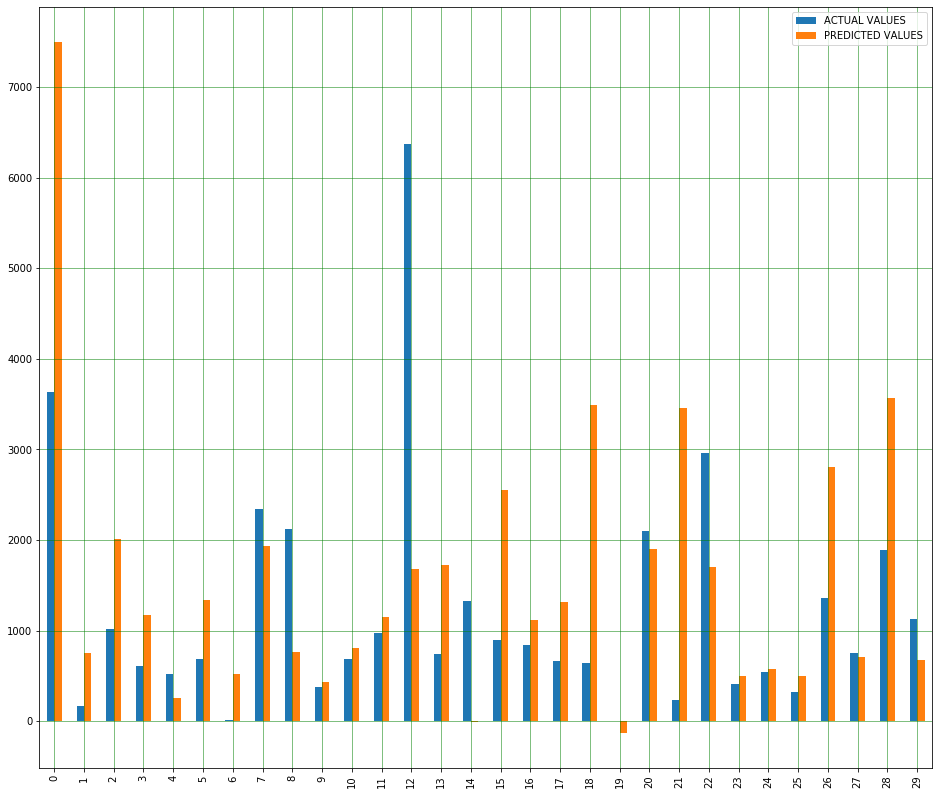

In [46]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
df1=pd.DataFrame({'ACTUAL VALUES':y_test.flatten(),'PREDICTED VALUES':y_pred.flatten()})
df2=df1.head(30)
df2.plot(kind='bar',figsize=(16,14))
plt.grid(color='green',linewidth='0.5',linestyle='-',which='major')